In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

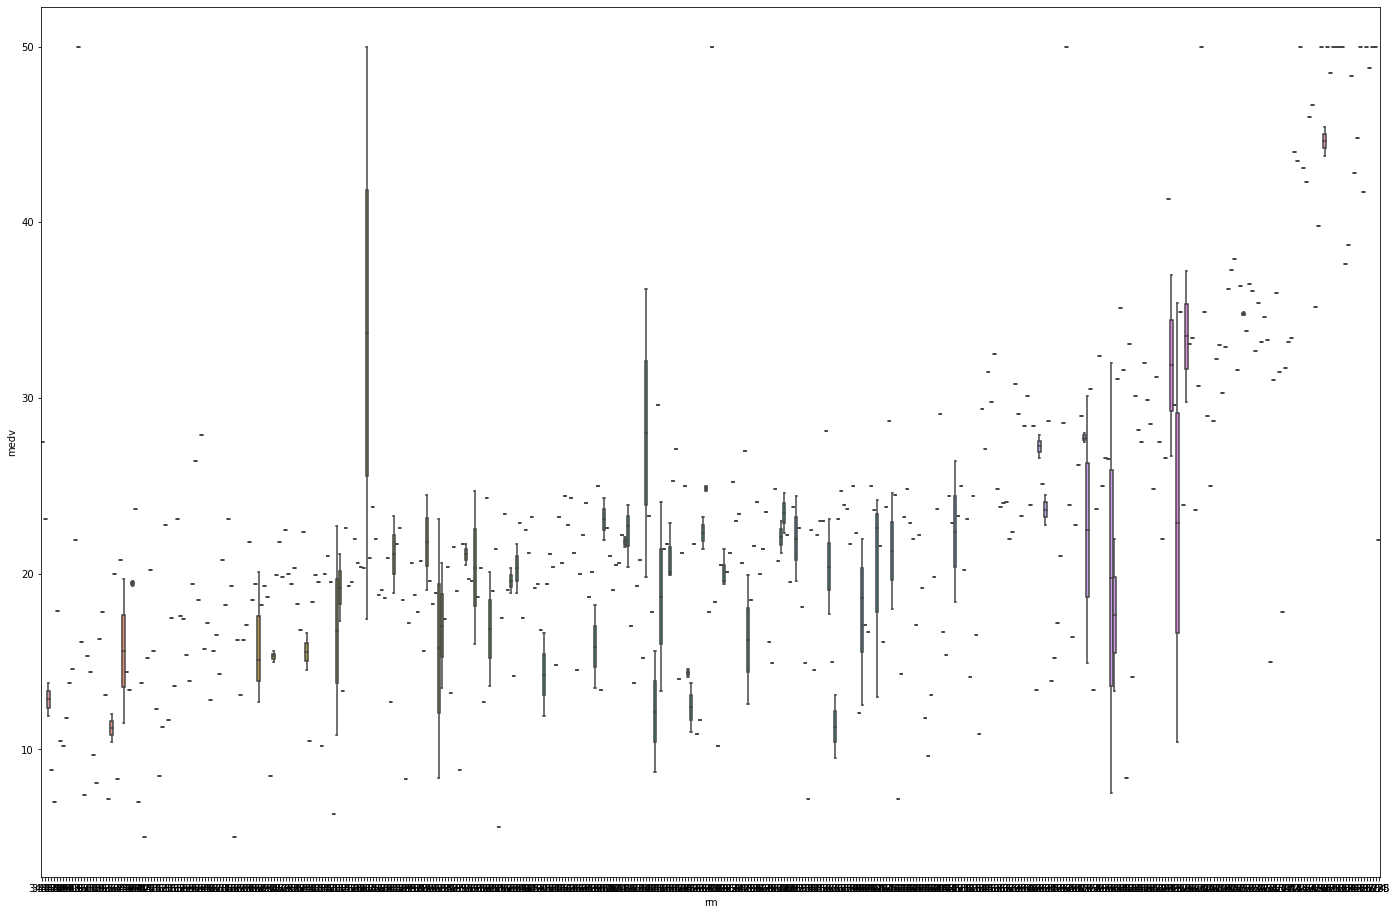

In [72]:
plt.figure(figsize=(24,16))
sns.boxplot(data=df,x='rm',y='medv')
plt.show()


In [73]:
mean=df['medv'].mean()
mean

22.532806324110698

In [74]:
std_dev=df['medv'].std()
std_dev

9.19710408737982

In [75]:
lower=mean-3*std_dev
lower

-5.0585059380287625

In [76]:
upper=mean+3*std_dev
upper

50.12411858625016

In [86]:
df['medv'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

In [77]:
outliers=[]
for i in df['medv']:
    if (i>upper or i<lower):
        outliers.append(i)

In [78]:
outliers

[]

<AxesSubplot:xlabel='rm'>

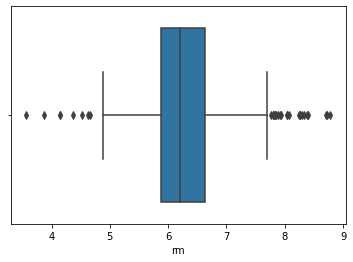

In [82]:
sns.boxplot(x=df['rm'])

<AxesSubplot:xlabel='lstat'>

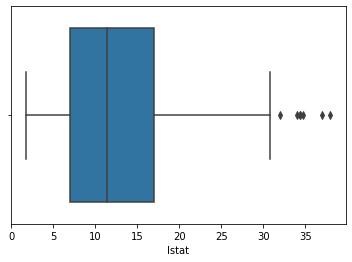

In [83]:
sns.boxplot(x=df['lstat'])

<AxesSubplot:xlabel='medv'>

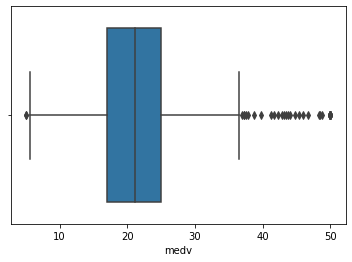

In [84]:
sns.boxplot(x=df['medv'])

<AxesSubplot:xlabel='rm', ylabel='medv'>

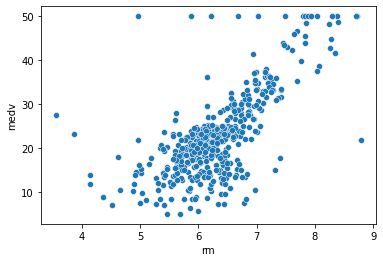

In [85]:
sns.scatterplot(data=df, x="rm", y="medv")

<AxesSubplot:xlabel='lstat', ylabel='medv'>

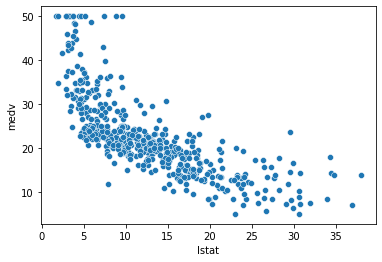

In [80]:
sns.scatterplot(data=df, x="lstat", y="medv")

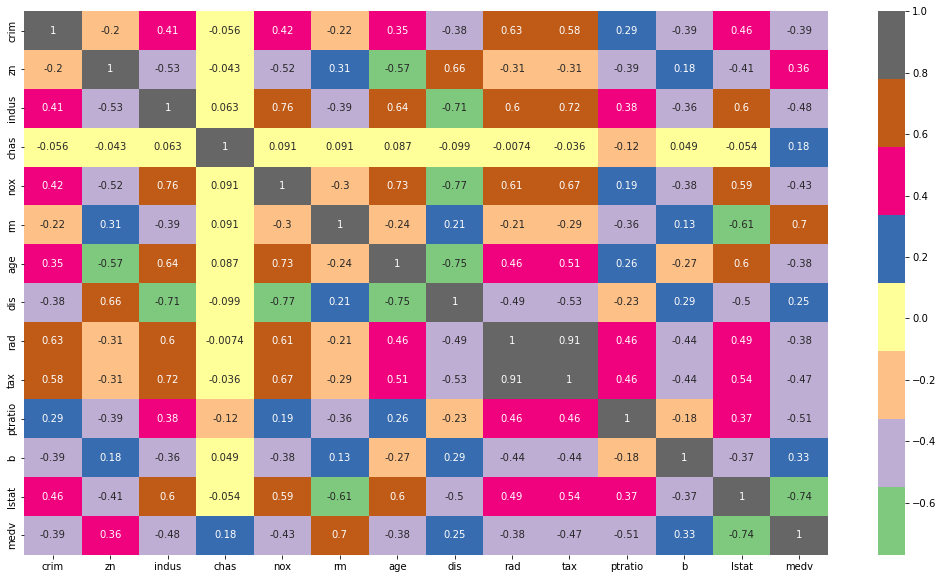

In [65]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr() ,annot=True , cmap=plt.cm.Accent)
plt.show()

In [68]:
df['rm']

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: rm, Length: 506, dtype: float64

In [69]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Figure size 2016x1440 with 0 Axes>

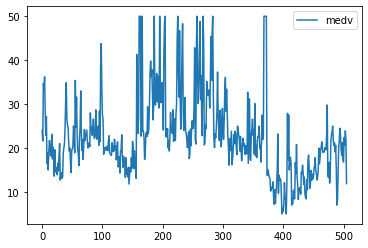

In [67]:
plt.figure(figsize=(28,20))
df.plot.line(y="medv",use_index=False)
plt.show()

In [50]:
#dividing into dependent and independent features:
X = df.drop('medv',axis=1)
y = df['medv']

In [51]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [52]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split

In [70]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)

LinearRegression(normalize=True)

In [56]:
pred = lr.predict(X_test)
pred

array([34.01651319, 31.05189517, 22.33884524, 18.0838353 , 20.56688064,
       25.98808555, 26.01540609, 23.82611577, 22.21599346, 19.28360875,
       26.66123555, 16.98260577, 20.99150244, 15.24603617, 41.09899335,
       20.25245593, 28.49362648, 19.02746332, 32.1219971 , 40.55013347,
       34.85510783, 16.62558247, 20.26594393, 17.78965573, 13.61712506,
       12.31506816, 27.30863471, 20.08837791, 18.3960775 , 20.36652738,
       15.63267698, 24.40174268, 38.95380335, 24.82674   , 31.67752332,
       28.52641185, 14.69895345, 14.24630553, 16.49088419, 23.30593651,
       23.14883147, 23.67414203, 13.62859392, 21.35912779, 31.4375316 ,
       26.93449598, 19.05250575, 16.18779463, 16.95967267, 12.540738  ,
       21.69054323, 20.12269149, 23.8317502 , 24.2081579 , 11.78551306,
       14.84388066, 25.02378959, 33.63041801, 10.04068529, 21.02680054,
       17.26643982, 19.29350402, 18.0135788 , 30.0595925 , 21.27173516,
       25.42909898, 15.88028621, 25.28296871, 22.47917188, 20.74

In [57]:
y_test

198    34.6
229    31.5
502    20.6
31     14.5
315    16.2
       ... 
272    24.4
124    18.8
178    29.9
447    12.6
282    46.0
Name: medv, Length: 152, dtype: float64

In [58]:
frame = pd.DataFrame({"Actual" : y_test , "Predicted" : pred})
frame

,Actual,Predicted
198,34.6,34.016513
229,31.5,31.051895
502,20.6,22.338845
31,14.5,18.083835
315,16.2,20.566881
...,...,...
272,24.4,28.214334
124,18.8,20.692753
178,29.9,30.961978
447,12.6,18.159312


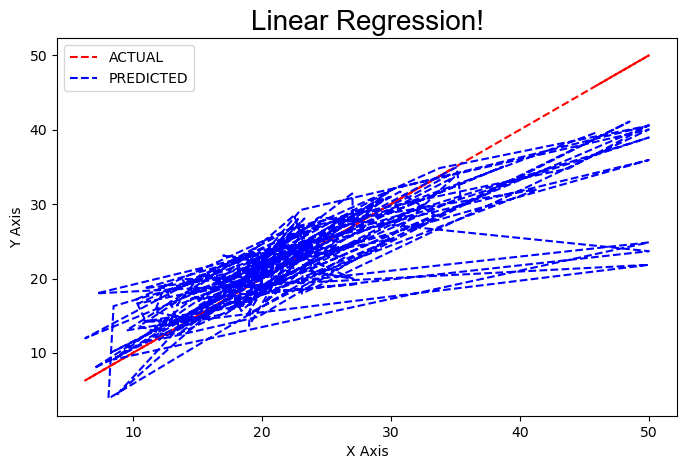

In [59]:
plt.figure(figsize=(8,5), dpi=100)

plt.plot(y_test, y_test, 'r--',label='ACTUAL') 
plt.plot(y_test, pred, 'b--',label='PREDICTED')

plt.title('Linear Regression!', fontdict={'fontname': 'Arial', 'fontsize': 20})
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()

In [60]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score
import math

In [61]:
print("Mean Absoulte Error:",mean_absolute_error(y_test,pred))
print("Mean Squared Error:",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:",math.sqrt(mean_squared_error(y_test,pred)))
print("R^2 Score:",r2_score(y_test, pred))

Mean Absoulte Error: 3.4719478482701627
Mean Squared Error: 29.798844301478827
Root Mean Squared Error: 5.458831770761838
R^2 Score: 0.705791987326454
